#CA06: Customer Segmentation using K-Means Clustering
Objective: The aim of this assignment is to perform customer segmentation
using the K-Means clustering algorithm in order to better understand the
different types of customers in a given dataset.

## Task 1

In [17]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset from the provided URL
url = "https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv"
df = pd.read_csv(url)

In [4]:
#Print the first few rows of the dataset
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
#Rename Genre to Gender
df = df.rename(columns={'Genre': 'Gender'})

1. **CustomerID**: Unique ID for each customer
2. **Gender**: Male or Female
3. **Age**: Age of the customer
4. **Annual Income (k$)**: Annual income of the customer in thousands of dollars
5. **Spending Score (1-100)**: A score assigned by the mall based on customer
behavior and spending nature (higher scores indicate higher spending)

In [9]:
#Print the sum of the null values in each column to see the missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are no missing values in the dataset

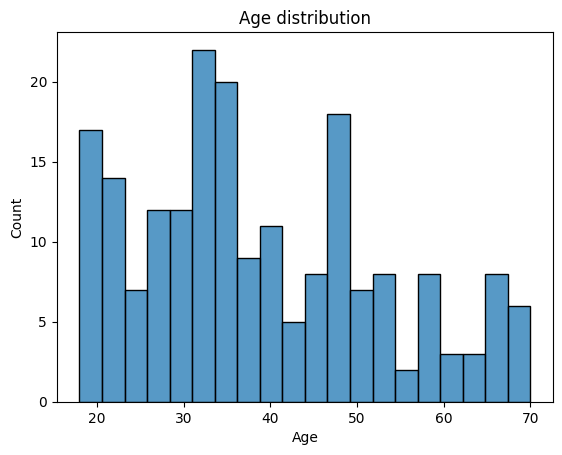

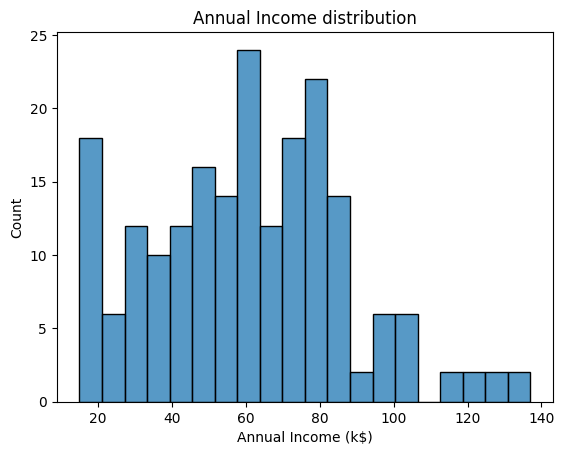

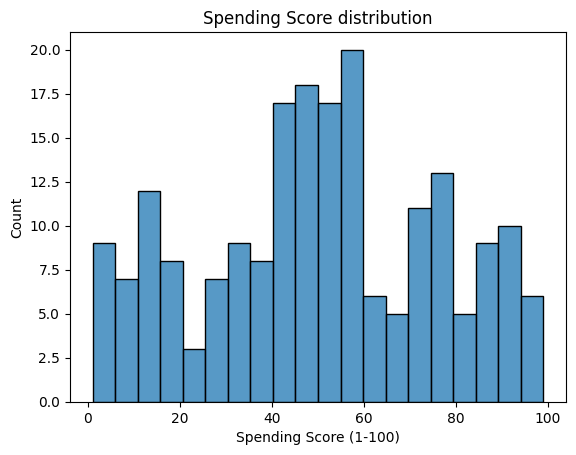

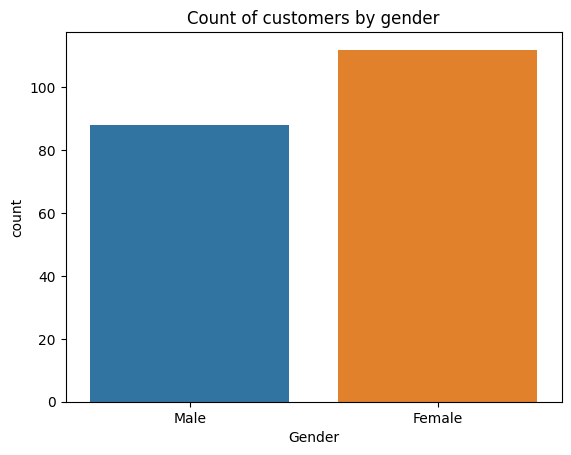

In [15]:
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age distribution')
plt.show()

sns.histplot(data=df, x='Annual Income (k$)', bins=20)
plt.title('Annual Income distribution')
plt.show()

sns.histplot(data=df, x='Spending Score (1-100)', bins=20)
plt.title('Spending Score distribution')
plt.show()

sns.countplot(data=df, x='Gender')
plt.title('Count of customers by gender')
plt.show()

* Age is approximately normally distributed with a mean around 38 years old.
* Annual Income is skewed to the right, with a majority of customers having an * Annual income between 50k and 80k.
* Spending Score is roughly normally distributed with a mean around 50.
* There are no significant outliers in the dataset.
* We can see that there are slightly more female customers than male customers in the dataset.

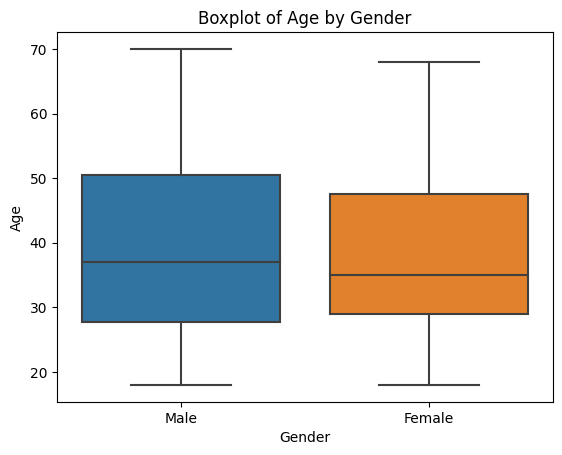

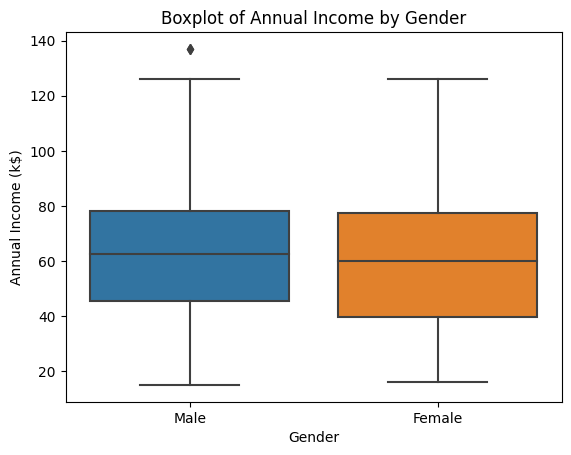

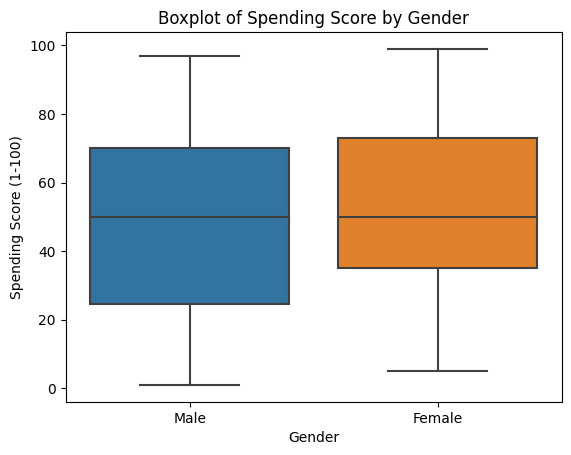

In [13]:
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Boxplot of Age by Gender')
plt.show()

sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')
plt.title('Boxplot of Annual Income by Gender')
plt.show()

sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Boxplot of Spending Score by Gender')
plt.show()

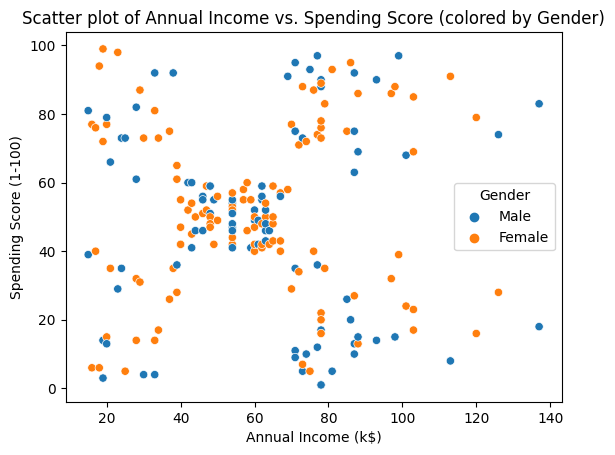

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Scatter plot of Annual Income vs. Spending Score (colored by Gender)')
plt.show()

## Task 2: Prepare the data for clustering

In [18]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [19]:
# Choose appropriate features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:
# Create a new DataFrame with selected features
X_df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
X_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [25]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

## Task 3: Implement K-means clustering

In [26]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
# Use the Silhouette Method to determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    # Fit a KMeans model for each number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    # Compute the average Silhouette score for each model
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print("Silhouette Scores: " ,score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Silhouette Scores:  0.3146990432802128
Silhouette Scores:  0.46658474419000145
Silhouette Scores:  0.4939069237513199
Silhouette Scores:  0.5546571631111091
Silhouette Scores:  0.5398800926790663
Silhouette Scores:  0.5263454490712252
Silhouette Scores:  0.4558438123118706
Silhouette Scores: 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 0.45532159949822093
Silhouette Scores:  0.4476280825932578


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


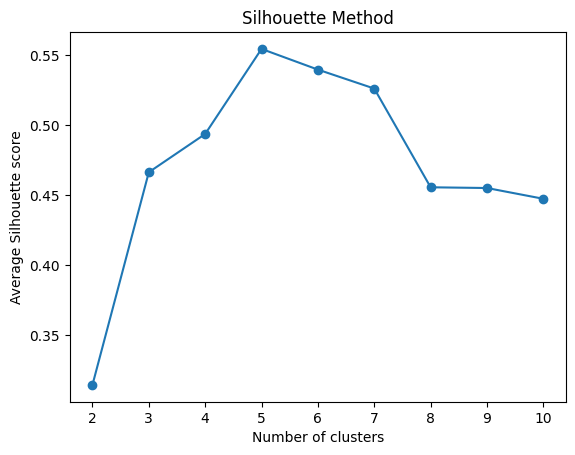

In [31]:
# Plot the average Silhouette scores for each number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette score')
plt.title('Silhouette Method')
plt.show()

From the plot, we can see that the optimal number of clusters is 5, since this is where the average Silhouette score is highest.

In [32]:
# Fit a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [33]:
# Get the cluster assignments for each data point
clusters = kmeans.predict(X_scaled)

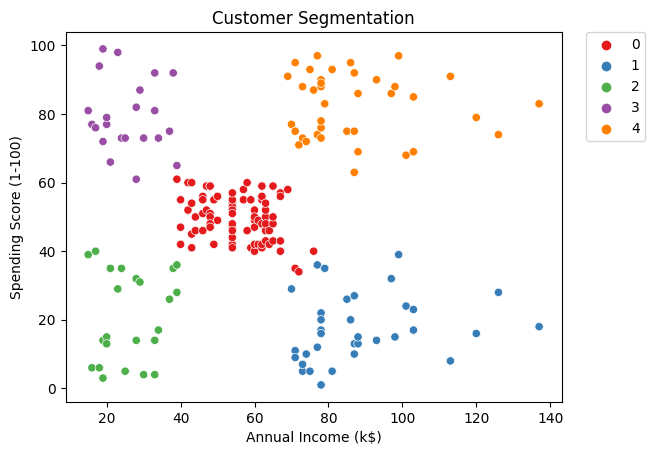

In [70]:
# Create a scatter plot of the selected features, colored by cluster assignment
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='Set1')
plt.title('Customer Segmentation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

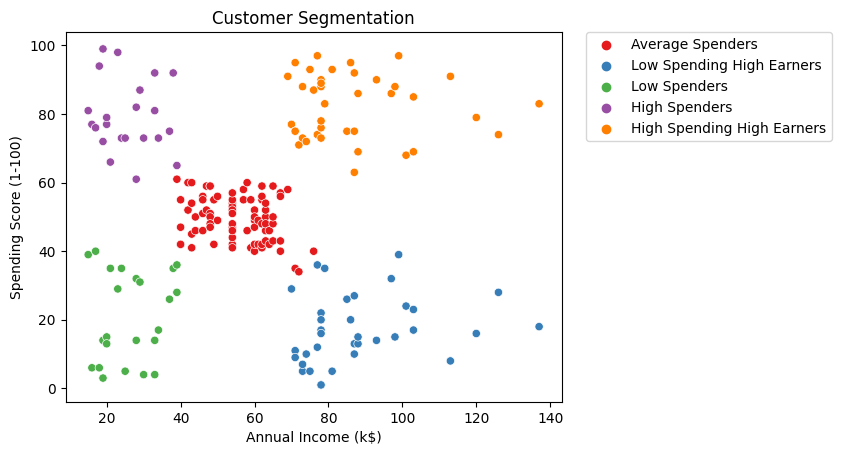

In [78]:
# Define the cluster names
cluster_names = ['Average Spenders', 'Low Spending High Earners','Low Spenders', 'High Spending High Earners', 'High Spenders']

# Create a scatter plot of the selected features, colored by cluster assignment
scatter = sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='Set1')
plt.title('Customer Segmentation')

# Get the handles and labels of the legend
handles, labels = scatter.get_legend_handles_labels()

# Create a dictionary that maps the cluster labels to the cluster names
cluster_dict = dict(zip(list(set(labels)), cluster_names))

# Create a new list of labels that includes the cluster names
new_labels = [cluster_dict[label] for label in labels]

# Update the legend with the new labels
scatter.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

* Cluster 0 (green): Low Spenders - Customers with low annual income and low spending score
* Cluster 1 (purple): High Spenders - Customers with high annual income and high spending score
* Cluster 2 (red): Average Spenders - Customers with moderate annual income and moderate spending score
* Cluster 3 (blue): Low Spending High Earners - Customers with high annual income and low spending score
* Cluster 4 (orange): High Spending Low Earners - Customers with low annual income and high spending score

## Task 5: Report Summarizing my findings

### The dataset and its attributes
The dataset contains information on customers of a mall, and includes the following attributes:

* CustomerID: Unique ID for each customer
* Gender: Gender of the customer (Male or Female)
* Age: Age of the customer
* Annual Income (k$): Annual income of the customer in thousands of dollars
* Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature (higher scores indicate higher spending)

###  Steps taken for data preprocessing, feature selection, and scaling
* In Task 1, we loaded the dataset and performed exploratory data analysis (EDA), checking for missing values and visualizing the distribution of features using histograms and boxplots.

* In Task 2, we selected the appropriate features for clustering (Annual Income and Spending Score), performed feature scaling using the StandardScaler, and created a new DataFrame with the scaled features.

* In Task 3, we used the Silhouette Method to determine the optimal number of clusters (5) and trained a KMeans model with 5 clusters.

* In Task 4, we visualized and analyzed the clusters by creating a scatter plot of the selected features, colored by cluster assignment, and interpreting the clusters based on their characteristics.

### Determining the number of clusters

* In Task 3, we used the Silhouette Method to determine the optimal number of clusters. The Silhouette Method computes a score for each data point based on how similar it is to its own cluster compared to other clusters. The average Silhouette score across all data points can be used to evaluate the overall quality of the clustering. We looped through a range of possible cluster numbers, fit a KMeans model for each number of clusters, and computed the average Silhouette score for each model. We then plotted the average Silhouette scores for each number of clusters to find the optimal number of clusters, which was 5 in this case.

### Clusters and characteristics
* Cluster 0 (green): Low Spenders - Customers with low annual income and low spending score
* Cluster 1 (purple): High Spenders - Customers with high annual income and high spending score
* Cluster 2 (red): Average Spenders - Customers with moderate annual income and moderate spending score
* Cluster 3 (blue): Low Spending High Earners - Customers with high annual income and low spending score
* Cluster 4 (orange): High Spending Low Earners - Customers with low annual income and high spending score

### Insights and Recommendations
Based on our analysis, we can make the following insights and recommendations:

* Mall managers should focus on targeting (High Spenders) and (High Spending Low Earners), as they are likely to generate the most revenue for the mall.
* Mall managers could offer discounts or promotions to (Low Spenders) and (Low Spending High Earners) in order to encourage them to spend more at the mall.
* Mall managers could also consider creating targeted marketing campaigns for each cluster in order to better appeal to the specific needs and preferences of each group.
* Adding additional features such as age and gender to the clustering analysis could provide more insight into the behavior and preferences of different customer segments.